In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [2]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [3]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.axis_equal()
    vis.show()

In [4]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.axis_equal()
    vis.show()

In [5]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.axis_equal()
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

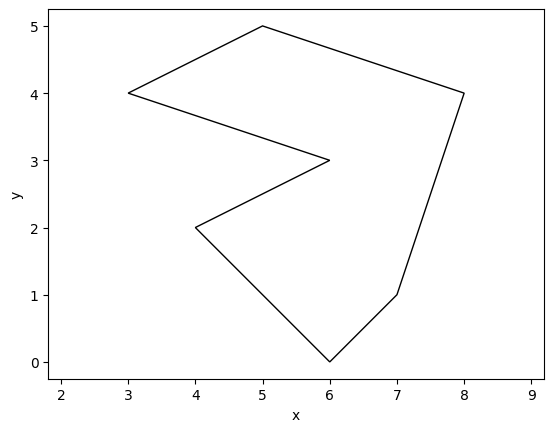

In [6]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [7]:
%matplotlib tk

import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from datetime import datetime

polygon = []  # Lista punktów
lines = []  # Lista linii do usunięcia

def draw_points(ax, point):
    ax.scatter(point[0], point[1], color="red")
    plt.draw()

def draw_line(ax, point1, point2):
    """Rysuje linię między dwoma punktami."""
    line, = ax.plot([point1[0], point2[0]], [point1[1], point2[1]], color="red")
    lines.append(line)
    plt.draw()

def clear_lines():
    global lines
    for line in lines:
        line.remove()
    lines = []

def reset_polygon(event):
    global polygon, lines
    polygon = []
    lines = []
    ax.cla()
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])
    ax.set_aspect('equal')
    ax.set_title("Kliknij, aby dodać wierzchołek.\nKliknij prawym, aby zamknąć wielokąt. Przyciski: Zapisz, Wczytaj, Reset.")
    plt.draw()

def save_polygon(event):
    if polygon:
        timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
        filename = f"polygon_points_{timestamp}.txt"
        with open(filename, "w") as file:
            for point in polygon:
                file.write(f"{point[0]} {point[1]}\n")
        plt.close()

def load_polygon(event):
    global polygon
    Tk().withdraw()
    file_path = askopenfilename(title="Wybierz plik z punktami wielokąta", filetypes=[("All Files", "*.*")])
    if not file_path:
        return
    try:
        loaded_polygon = [tuple(map(float, line.strip().split())) for line in open(file_path, "r")]
    except Exception:
        return
    if len(loaded_polygon) < 3:
        return

    ax.cla()
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])
    ax.set_aspect('equal')
    ax.set_title("Kliknij, aby dodać wierzchołek.\nKliknij prawym, aby zamknąć wielokąt.")
    
    polygon[:] = loaded_polygon
    
    for point in polygon:
        draw_points(ax, point)
    
    for i in range(len(polygon) - 1):
        draw_line(ax, polygon[i], polygon[i + 1])
    

    if len(polygon) > 2:
        draw_line(ax, polygon[-1], polygon[0])

    plt.draw()
    
def is_clockwise(points):

    total = 0
    for i in range(len(points)):
        x1, y1 = points[i]
        x2, y2 = points[(i + 1) % len(points)]
        total += (x2 - x1) * (y2 + y1)
    return total > 0


def onclick(event):
    global polygon
    if not ax.contains(event)[0]:
        return

    if event.button == 1:  
        if event.xdata is None or event.ydata is None:
            return
        x, y = event.xdata, event.ydata
        new_point = (x, y)
        polygon.append(new_point)
        draw_points(ax, new_point)
        if len(polygon) > 1:
            draw_line(ax, polygon[-2], polygon[-1])  
    elif event.button == 3:  
        if len(polygon) > 2: 
            if is_clockwise(polygon):  
                polygon.reverse() 
            draw_line(ax, polygon[-1], polygon[0]) 

fig, ax = plt.subplots()
plt.get_current_fig_manager().set_window_title("Wygeneruj własny wielokąt!")
ax.set_title("Kliknij, aby dodać wierzchołek.\nKliknij prawym, aby zamknąć wielokąt.")
fig.canvas.mpl_connect("button_press_event", onclick)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_aspect('equal')

ax_save = plt.axes([0.7, 0.01, 0.1, 0.075])
ax_load = plt.axes([0.58, 0.01, 0.1, 0.075])
ax_reset = plt.axes([0.46, 0.01, 0.1, 0.075])

btn_save = Button(ax_save, "Zapisz")
btn_load = Button(ax_load, "Wczytaj")
btn_reset = Button(ax_reset, "Reset")

btn_save.on_clicked(save_polygon)
btn_load.on_clicked(load_polygon)
btn_reset.on_clicked(reset_polygon)

plt.tight_layout()
plt.ion()
plt.show()


C:\Users\Maciek\AppData\Local\Temp\ipykernel_7196\1524878853.py:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


[(4.792116099308833, 9.848380995850501), (3.3369287944706727, 9.341663987915783), (4.480290248272084, 8.964874417913045), (2.453422216533218, 8.601077591703504), (4.298391835167314, 8.107353327561988), (1.6868503327345437, 7.548665344454478), (3.8826240337849836, 7.015962848933365), (1.1411550934202346, 6.470267609619056), (3.856638546198587, 5.8855941389251525), (0.608452597899122, 5.0800440237468845), (3.6747401330938168, 4.521356040639376), (0.08874284617120765, 3.8977043385658794), (3.687732876887015, 3.365001843044767), (0.3485977220351648, 2.2866041082093442), (3.9605804965441695, 1.9747782571725954), (4.025544215510159, 0.9743369850963599), (5.155912925518374, 0.7664530844051942), (5.077956462759186, 2.026749232345387), (8.105265766574288, 2.9102558102828415), (4.727152380342844, 3.7677769006339004), (8.650961005888597, 4.339457627534607), (4.07751519068295, 5.132014998919676), (9.144685270030116, 5.508804568922414), (4.220435372408128, 6.366325659273473), (8.767895700027378, 6.

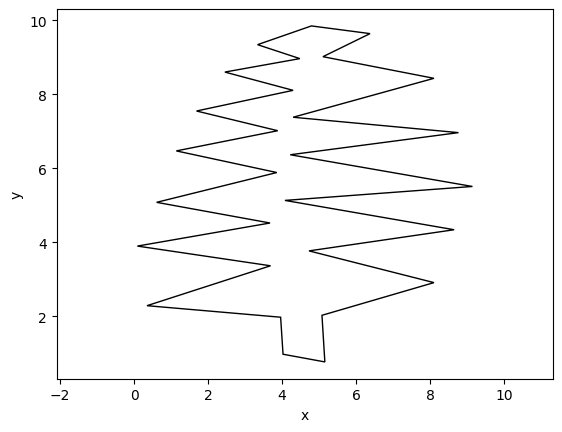

In [30]:
%matplotlib inline
print(polygon)
if len(polygon)<3:
    print("Nieprawidłowy wielokąt - wprowadzono mniej niż 3 punkty.")
else:
    draw_polygon(polygon)


## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [31]:
#funkcje pomocnicze do y-monotoniczności
def find_max_y(polygon):
    max_index = 0
    max_y = polygon[0][1]
    for i in range(1,len(polygon)):
        if polygon[i][1] > max_y:
            max_y = polygon[i][1]
            max_index = i
    return max_index

def find_min_y(polygon):
    min_index = 0
    min_y = polygon[0][1]
    for i in range(1,len(polygon)):
        if polygon[i][1] < min_y:
            min_y = polygon[i][1]
            min_index = i
    return min_index

def find_left_and_right_chain(polygon):
    n = len(polygon)
    left_chain = []
    right_chain = []

    # Znajdź indeksy punktów skrajnych
    min_index, max_index = find_min_y(polygon), find_max_y(polygon)

    if min_index < max_index:
        # Budujemy prawy łańcuch (wstecz od max do min)
        for i in range(max_index - 1, min_index - 1, -1):
            right_chain.append((polygon[i], i))
        # Budujemy lewy łańcuch (od max do końca + od początku do min)
        for i in range(max_index, n):
            left_chain.append((polygon[i], i))
        for i in range(0, min_index + 1):
            left_chain.append((polygon[i], i))
    else:
        # Budujemy lewy łańcuch (od max do min)
        for i in range(max_index, min_index + 1):
            left_chain.append((polygon[i], i))
        # Budujemy prawy łańcuch (od max wstecz do początku + od końca do min)
        for i in range(max_index - 1, -1, -1):
            right_chain.append((polygon[i], i))
        for i in range(n - 1, min_index - 1, -1):
            right_chain.append((polygon[i], i))

    return left_chain, right_chain



In [32]:
def is_y_monotonic(polygon):
    left_chain, right_chain = find_left_and_right_chain(polygon)
    for i in range(len(left_chain)-1):
        if left_chain[i+1][0][1] > left_chain[i][0][1]:
            return False
    for j in range(len(right_chain)-1):
        if right_chain[j+1][0][1] > right_chain[j][0][1]:
            return False
    
    return True
    raise Exception("Unimplemented")

Przeprowadź test poprawności powyższej funkcji.

In [33]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Sprawdź monotoniczność swojego wielokątu.

True


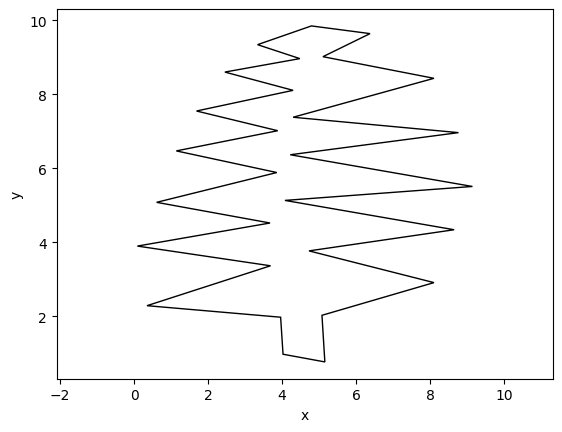

In [34]:
print(is_y_monotonic(polygon))
if len(polygon)<3:
    print("Nieprawidłowy wielokąt - wprowadzono mniej niż 3 punkty.")
else:
    draw_polygon(polygon)


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

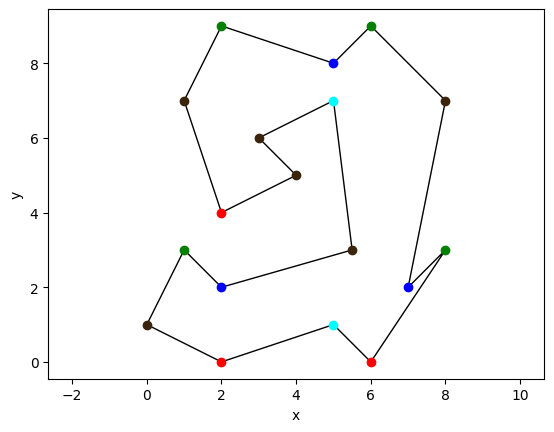

In [35]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [36]:
def orient(a,b,c):
    """
    Funkcja sprawdza, czy punkty a,b,c tworzą lewo- czy prawostronny skręt, obliczając wyznacznik odpowiedniej macierzy
    :param a: krotka współrzędnych (x, y) pierwszego punktu
    :param b: krotka współrzędnych (x, y) punktu, dla którego badamy rodzaj skrętu
    :param c: krotka współrzędnych (x, y) ostatniego punktu w układzie
    :return: wartość odpowiedniego wyznacznika macierzy, dodatnia jeżeli skręt jest lewostronny),
    ujemna jeżeli skręt jest prawostronny, w przeciwnym razie równa zero (punkty współliniowe)
    """
    return a[0]*c[1]+a[1]*b[0]+c[0]*b[1]-c[1]*b[0]-a[0]*b[1]-a[1]*c[0]

In [37]:
def color_vertex(polygon):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 
    0 - początkowy(obaj sąsiedzi poniżej i kąt wewnętrzny<180
    1 - końcowy (obaj sąsiedzi powyżej i kąt wewnętrzny<180
    2 - łączący (obaj sąsiedzi powyżej i kąt wewnętrzny>180
    3 - dzielący (obaj sąsiedzi poniżej i kąt wewnętrzny>180
    4 - prawdiłowy (jeden sąsiad powyżej, drugi poniżej)
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    n = len(polygon)
    T = [None for _ in range(n)]
    for i in range(n):
        prev = polygon[(i-1)%n]
        next = polygon[(i+1)%n]
        if prev[1]<polygon[i][1] and next[1]<polygon[i][1]: #oba niżej
            if orient(prev,polygon[i],next)<0: #ccw czyli lewostronny skręt - kąt wewnętrzny<180
                T[i] = 0
            else:
                T[i] = 3
        elif prev[1]>polygon[i][1] and next[1]>polygon[i][1]: #oba wyżej
            if orient(prev,polygon[i],next)<0:
                T[i] = 1
            else:
                T[i] = 2
        else:
            T[i] = 4
    return T
    raise Exception("Unimplemented")

Przeprowadź test poprawności powyższej funkcji. 

In [38]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

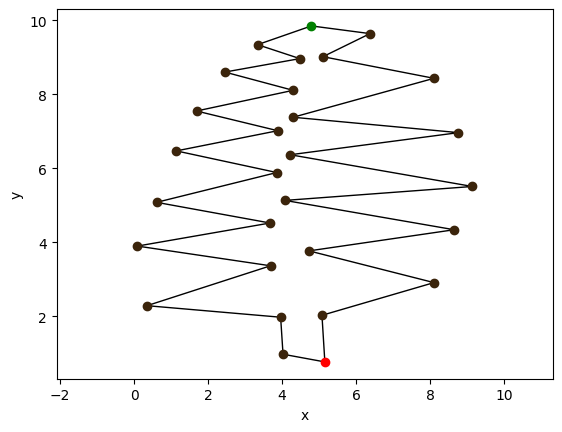

In [39]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

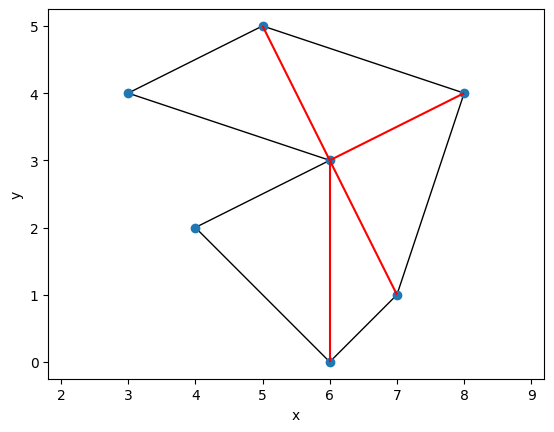

In [40]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [41]:
def find_max_y(polygon):
    max_index = 0
    max_y = polygon[0][1]
    for i in range(1,len(polygon)):
        if polygon[i][1] > max_y:
            max_y = polygon[i][1]
            max_index = i
    return max_index

def find_min_y(polygon):
    min_index = 0
    min_y = polygon[0][1]
    for i in range(1,len(polygon)):
        if polygon[i][1] < min_y:
            min_y = polygon[i][1]
            min_index = i
    return min_index

def find_left_and_right_chain(polygon):
    n = len(polygon)
    left_chain = []
    right_chain = []

    # Znajdź indeksy punktów skrajnych
    min_index, max_index = find_min_y(polygon), find_max_y(polygon)

    if min_index < max_index:
        # Budujemy prawy łańcuch (wstecz od max do min)
        for i in range(max_index - 1, min_index - 1, -1):
            right_chain.append((polygon[i], i))
        # Budujemy lewy łańcuch (od max do końca + od początku do min)
        for i in range(max_index, n):
            left_chain.append((polygon[i], i))
        for i in range(0, min_index + 1):
            left_chain.append((polygon[i], i))
    else:
        # Budujemy lewy łańcuch (od max do min)
        for i in range(max_index, min_index + 1):
            left_chain.append((polygon[i], i))
        # Budujemy prawy łańcuch (od max wstecz do początku + od końca do min)
        for i in range(max_index - 1, -1, -1):
            right_chain.append((polygon[i], i))
        for i in range(n - 1, min_index - 1, -1):
            right_chain.append((polygon[i], i))

    return left_chain, right_chain

def orient(a,b,c):
    return a[0]*c[1]+a[1]*b[0]+c[0]*b[1]-c[1]*b[0]-a[0]*b[1]-a[1]*c[0]

def correct_triangle(stack_point_one,stack_point_two,current_point,n):
    """
    Funkcja sprawdza, czy dane trzy punkty tworzą prawidłowy trójkąt w triangulacji. 
    :param stack_point_one: odpowiedni wierzchołek ze stosu, który potencjalnie może tworzyć trójkąt
    :param stack_point_two: "ostatni" wierzchołek ze stosu (niekoniecznie ze szczytu),
    który zostanie z niego usunięty, jeżeli trójkąt jest prawidłowy
    :param current_point: aktualnie badany punkt w wyznaczaniu triangulacji,
    który pochodzi z innego łańcucha niż punkt ze szczytu stosu
    :param n: liczba wierzchołków wielokąta, dla którego wyznaczamy triangulację
    :return: wartość bool - true, jeżeli trójkąt jest prawidłowy (punkty w kolejności przeciwnie do wskazówek zegara tworzą
    "prawostronny" skręt i potencjalna przekątna nie jest bokiem wielokąta) lub false, jeśli nie
    """
    if abs(current_point[1]-stack_point_one[1]) in [1,n-1]:
        return False
    if current_point[2]==False:
        return orient(current_point[0],stack_point_two[0],stack_point_one[0])<0
    else:
        return orient(stack_point_one[0],stack_point_two[0],current_point[0])<0

In [42]:
def triangulation(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego zgodnie z kolejnością CCW.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek trójkątów (i, j, k), oznacza, że triangulacja polega na stworzeniu trójkąta pomiędzy wierzchołki o indeksach i, j, k (w kolejności CCW)
    """
    n=len(polygon)
    left_chain,right_chain=find_left_and_right_chain(polygon)
    triangles=[]
    ordered = []
    i, j = 0, 0
    l, r = len(left_chain), len(right_chain)

    # Łączenie punktów w kolejności malejących współrzędnych y
    while i < l and j < r:
        if left_chain[i][0][1] > right_chain[j][0][1]:
            ordered.append((left_chain[i][0], left_chain[i][1], True))  # Punkt z lewego łańcucha
            i += 1
        else:
            ordered.append((right_chain[j][0], right_chain[j][1], False))  # Punkt z prawego łańcucha
            j += 1

    # Dodawanie pozostałych punktów
    while i < l:
        ordered.append((left_chain[i][0], left_chain[i][1], True))
        i += 1
    while j < r:
        ordered.append((right_chain[j][0], right_chain[j][1], False))
        j += 1
    stack=[ordered[0],ordered[1]]
    # Triangulacja
    for i in range(2, n):
        cur_point, cur_ind, cur_chain = ordered[i]
        if cur_chain != stack[-1][2]:
            # Jeśli punkt pochodzi z innego łańcucha
            while len(stack) > 1:
                top = stack.pop()
                triangles.append((stack[-1][1], top[1], cur_ind))
            stack = [stack[-1], (cur_point, cur_ind, cur_chain)]
        else:
            # Jeśli punkt pochodzi z tego samego łańcucha
            while len(stack) > 1:
                top = stack.pop()
                next_to_top = stack[-1]
                triangles.append((next_to_top[1], top[1], cur_ind))
            stack.append((cur_point, cur_ind, cur_chain))


    return triangles
    raise Exception("Unimplemented")

In [43]:
def triangulation_diagonals(polygon): #żeby przejść testy, trzeba zwrócić listę przekątnych, a nie listę trójek
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
    n=len(polygon)
    left_chain,right_chain=find_left_and_right_chain(polygon)
    diagonals=[]
    ordered = []
    i, j = 0, 0
    l, r = len(left_chain), len(right_chain)

    # Łączenie punktów w kolejności malejących współrzędnych y
    while i < l and j < r:
        if left_chain[i][0][1] > right_chain[j][0][1]:
            ordered.append((left_chain[i][0], left_chain[i][1], True))  # Punkt z lewego łańcucha
            i += 1
        else:
            ordered.append((right_chain[j][0], right_chain[j][1], False))  # Punkt z prawego łańcucha
            j += 1

    # Dodawanie pozostałych punktów
    while i < l:
        ordered.append((left_chain[i][0], left_chain[i][1], True))
        i += 1
    while j < r:
        ordered.append((right_chain[j][0], right_chain[j][1], False))
        j += 1
    stack=[ordered[0],ordered[1]]
    for i in range(2,n):
        cur_point,cur_ind,cur_chain=ordered[i]
        if cur_chain!=stack[-1][2]:
            for j in range(len(stack)-1,-1,-1):
                if abs(cur_ind-stack[j][1]) not in [1,n-1]:
                    diagonals.append([cur_ind,stack[j][1]])
            stack=[stack[-1]]
        else:
            last=len(stack)-1
            for j in range(len(stack)-2,-1,-1):
                if correct_triangle(stack[j],stack[last],(cur_point,cur_ind,cur_chain),n):
                    diagonals.append([cur_ind,stack[j][1]])
                    stack.pop()
                    last=j
        stack.append((cur_point,cur_ind,cur_chain))
    return diagonals
        
    raise Exception("Unimplemented")

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [44]:
Test().runtest(3, triangulation_diagonals)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

[(4.792116099308833, 9.848380995850501), (3.3369287944706727, 9.341663987915783), (4.480290248272084, 8.964874417913045), (2.453422216533218, 8.601077591703504), (4.298391835167314, 8.107353327561988), (1.6868503327345437, 7.548665344454478), (3.8826240337849836, 7.015962848933365), (1.1411550934202346, 6.470267609619056), (3.856638546198587, 5.8855941389251525), (0.608452597899122, 5.0800440237468845), (3.6747401330938168, 4.521356040639376), (0.08874284617120765, 3.8977043385658794), (3.687732876887015, 3.365001843044767), (0.3485977220351648, 2.2866041082093442), (3.9605804965441695, 1.9747782571725954), (4.025544215510159, 0.9743369850963599), (5.155912925518374, 0.7664530844051942), (5.077956462759186, 2.026749232345387), (8.105265766574288, 2.9102558102828415), (4.727152380342844, 3.7677769006339004), (8.650961005888597, 4.339457627534607), (4.07751519068295, 5.132014998919676), (9.144685270030116, 5.508804568922414), (4.220435372408128, 6.366325659273473), (8.767895700027378, 6.

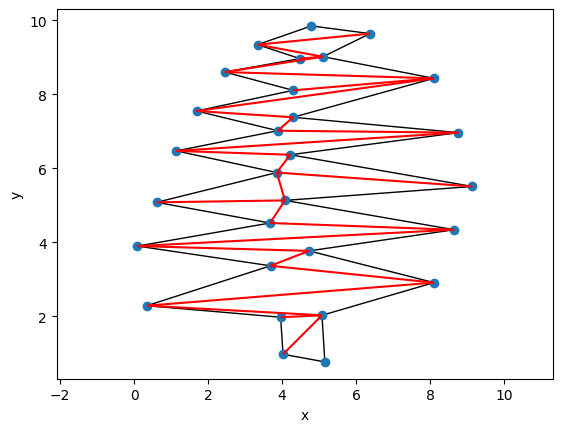

In [45]:
#Walidacja wyników
if len(polygon)<3:
    print("Nieprawidłowy wielokąt - wprowadzono mniej niż 3 punkty.")
elif is_y_monotonic(polygon):
    tri=triangulation_diagonals(polygon)
    draw_polygon_tri(polygon,[(polygon[x],polygon[y]) for (x,y) in tri])
else:
    print("Triangulacja dla wielokąta niemonotonicznego nie jest obsługiwana!")
print(polygon)
if len(polygon)<3:
    print("Nieprawidłowy wielokąt - wprowadzono mniej niż 3 punkty.")
elif is_y_monotonic(polygon):
    tri=triangulation(polygon)
    print("Triangulacja = " + str(tri))
else:
    print("Triangulacja dla wielokąta niemonotonicznego nie jest obsługiwana!")

In [46]:
def triangulation_draw(polygon):
    """
    Funkcja dokonuje wizualizacji triangulacji wielokąta monotonicznego, rysując kroki po kolei.
    Punkty lewego i prawego łańcucha są rysowane w różnych kolorach.
    :param polygon: lista punktów [(x, y), ...], reprezentujących wielokąt w kolejności CCW.
    :return: (lista przekątnych [(i, j)], obiekt Visualizer do generowania GIF-a).
    """
    vis = Visualizer()
    vis.add_point(polygon, color="grey")  # Początkowe punkty wielokąta
    vis.add_polygon(polygon, fill=False)  # Początkowy wielokąt

    n = len(polygon)
    left_chain, right_chain = find_left_and_right_chain(polygon)
    diagonals = []
    ordered = []
    i, j = 0, 0
    l, r = len(left_chain), len(right_chain)

    # Łączenie punktów w kolejności malejących współrzędnych y
    while i < l and j < r:
        if left_chain[i][0][1] > right_chain[j][0][1]:
            ordered.append((left_chain[i][0], left_chain[i][1], True))  # Punkt z lewego łańcucha
            vis.add_point(left_chain[i][0], color="blue")  # Lewy łańcuch na niebiesko
            i += 1
        else:
            ordered.append((right_chain[j][0], right_chain[j][1], False))  # Punkt z prawego łańcucha
            vis.add_point(right_chain[j][0], color="red")  # Prawy łańcuch na czerwono
            j += 1

    while i < l:
        ordered.append((left_chain[i][0], left_chain[i][1], True))
        vis.add_point(left_chain[i][0], color="blue")  # Lewy łańcuch na niebiesko
        i += 1
    while j < r:
        ordered.append((right_chain[j][0], right_chain[j][1], False))
        vis.add_point(right_chain[j][0], color="red")  # Prawy łańcuch na czerwono
        j += 1

    # Inicjalizacja stosu
    stack = [ordered[0], ordered[1]]
    vis.add_point([ordered[0][0], ordered[1][0]], color="yellow")  # Pierwsze punkty stosu na żółto

    # Triangulacja
    for i in range(2,n):
        cur_point,cur_ind,cur_chain=ordered[i]
        vis.add_point(cur_point, color="yellow")  # Aktualny punkt na żółto
        if cur_chain!=stack[-1][2]:
            for j in range(len(stack)-1,-1,-1):
                if abs(cur_ind-stack[j][1]) not in [1,n-1]:
                    diagonals.append([cur_ind,stack[j][1]])
                    vis.add_line_segment([cur_point, stack[j][0]], color="green")
            stack=[stack[-1]]
        else:
            last=len(stack)-1
            for j in range(len(stack)-2,-1,-1):
                if correct_triangle(stack[j],stack[last],(cur_point,cur_ind,cur_chain),n):
                    diagonals.append([cur_ind,stack[j][1]])
                    vis.add_line_segment([cur_point, stack[j][0]], color="green")
                    stack.pop()
                    last=j
        stack.append((cur_point,cur_ind,cur_chain))

    return diagonals, vis


In [47]:
triangulation, gif_triangulation = triangulation_draw(polygon)

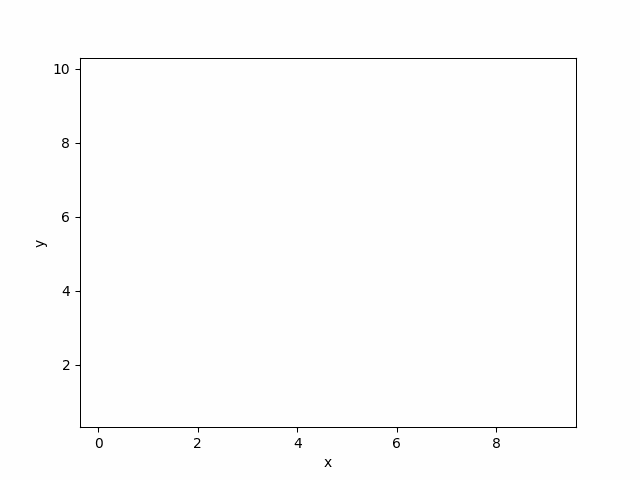

In [48]:

gif_triangulation.axis_equal
gif_triangulation.show_gif(interval=500)
